In [343]:
#Importing Libraries

#import sys
#!{sys.executable} -m pip install pandas
import pandas as pd

#import sys
#!{sys.executable} -m pip install numpy
import numpy as np

#import sys
#!{sys.executable} -m pip install yahoofinancials
from yahoofinancials import YahooFinancials

#import sys
#!{sys.executable} -m pip install xlrd
import xlrd as xls

#import sys
#!{sys.executable} -m pip install openpyxl
import openpyxl as oplx

#import sys
#!{sys.executable} -m pip install seaborn
import seaborn; seaborn.set()

#import sys
#!{sys.executable} -m pip install scikit-learn
from sklearn.metrics import mean_squared_error

#import sys
#!{sys.executable} -m pip install matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [344]:
#new
ticker_details = pd.read_excel("Tickers_List.xlsx")
ticker_details.head()

,Ticker,Description
0,GC=F,Gold


In [345]:
#new
ticker = ticker_details['Ticker'].to_list()
names = ticker_details['Description'].to_list()

In [346]:
#new
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key

end_date= "2021-01-15"
start_date = "2000-09-01"
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [347]:
#new
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key

for i in ticker:
    raw_data = YahooFinancials(i)
    raw_data = raw_data.get_historical_price_data(start_date, end_date, "daily")
    #try:
    df = pd.DataFrame(type(raw_data).__getitem__(raw_data, i)['prices'])[['formatted_date','adjclose']]
    #print(i+' Working')
    #except TypeError:
    #print(i+'not working')
    df.columns = ['Date1',i]
    df['Date1']= pd.to_datetime(df['Date1'])
    values = values.merge(df,how='left',left_on='Date',right_on='Date1')
    values = values.drop(labels='Date1',axis=1)

In [348]:
#new
#convert Date into DateTime

values['Date']=pd.to_datetime(values['Date'])
values.set_index('Date',inplace=True)
print(values)
#values.describe()

                   GC=F
Date                   
2000-09-01   277.000000
2000-09-04          NaN
2000-09-05   275.799988
2000-09-06   274.200012
2000-09-07   274.000000
...                 ...
2021-01-11  1849.599976
2021-01-12  1842.900024
2021-01-13  1853.599976
2021-01-14  1850.300049
2021-01-15          NaN

[5316 rows x 1 columns]


In [349]:
#new
end_date

'2021-01-15'

In [350]:
#new
end = pd.Timestamp(end_date)

In [351]:
#new
end

Timestamp('2021-01-15 00:00:00')

In [352]:
#new table that spreadsheet with date and steps
table = pd.read_excel("Untitled spreadsheet (2).xlsx")
table.head()

,Steps,Date,num
0,1,2021-01-01,1
1,2,2021-01-02,2
2,3,2021-01-03,3
3,4,2021-01-04,4
4,5,2021-01-05,5


In [353]:
#new
table.shape

(50, 3)

In [354]:
#new
table.dtypes

Steps             int64
Date     datetime64[ns]
num               int64
dtype: object

In [355]:
#new
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Steps   50 non-null     int64         
 1   Date    50 non-null     datetime64[ns]
 2   num     50 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 KB


In [356]:
#new
table

,Steps,Date,num
0,1,2021-01-01,1
1,2,2021-01-02,2
2,3,2021-01-03,3
3,4,2021-01-04,4
4,5,2021-01-05,5
5,6,2021-01-06,6
6,7,2021-01-07,7
7,8,2021-01-08,8
8,9,2021-01-09,9
9,10,2021-01-10,10


In [357]:
#new here we set num as index so it starts from 1 
tab = table.set_index("num", drop = True)

In [358]:
#new
tab

,Steps,Date
num,,
1,1,2021-01-01
2,2,2021-01-02
3,3,2021-01-03
4,4,2021-01-04
5,5,2021-01-05
6,6,2021-01-06
7,7,2021-01-07
8,8,2021-01-08
9,9,2021-01-09


In [359]:
#new
tab.iloc[4:10]

,Steps,Date
num,,
5,5,2021-01-05
6,6,2021-01-06
7,7,2021-01-07
8,8,2021-01-08
9,9,2021-01-09
10,10,2021-01-10


In [360]:
tab.shape

(50, 2)

In [361]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Steps   50 non-null     int64         
 1   Date    50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [362]:
tab.dtypes

Steps             int64
Date     datetime64[ns]
dtype: object

In [363]:
#s=tab.at[46,"Date"]

In [364]:
#s

Timestamp('2021-02-15 00:00:00')

In [365]:
#if (tab['Date'][15] == end):
 #   print("Yes")
#else:
 #   print("No")

Yes


In [377]:
# new here we deleted the date which is before the end date and now we have the dates which is on and after the end date and also the steps are started from 1 so that we can easiy know what is the last step num so we can give that as input to steps=XXXX(last cell)
count = 0
#empty = 0
for num in tab.index:
    if (tab['Date'][num] == end): #or (empty == 1):
        tab['Steps'][num] = count + 1
        #print(tab['Steps'][num],tab['Date'][num])
        count = count+1
        #empty = 1
        s = tab.iloc[num-1:]
    #print(s)

<ipython-input-377-d37d236c742f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab['Steps'][num] = count + 1


In [378]:
s

,Steps,Date
num,,
15,1,2021-01-15
16,2,2021-01-16
17,3,2021-01-17
18,4,2021-01-18
19,5,2021-01-19
20,6,2021-01-20
21,7,2021-01-21
22,8,2021-01-22
23,9,2021-01-23


In [379]:
#count = 0
#empty = 0
#for num in tab.index:
#    if (tab['Date'][num] == end) or (empty == 1):
#        tab['Steps'][num] = count + 1
#        print(tab['Steps'][num],tab['Date'][num])
#        count = count+1
#        empty = 1

In [380]:
values.head()

,GC=F
Date,
2000-09-01,277.000000
2000-09-04,NaN
2000-09-05,275.799988
2000-09-06,274.200012
2000-09-07,274.000000


In [381]:
values.tail()

,GC=F
Date,
2021-01-11,1849.599976
2021-01-12,1842.900024
2021-01-13,1853.599976
2021-01-14,1850.300049
2021-01-15,NaN


In [382]:
values.dtypes

GC=F    float64
dtype: object

In [383]:
values.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5316 entries, 2000-09-01 to 2021-01-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GC=F    5077 non-null   float64
dtypes: float64(1)
memory usage: 83.1 KB


In [384]:
values.describe()

,GC=F
count,5077.000000
mean,999.491058
std,480.209327
min,255.100006
25%,466.100006
50%,1157.599976
75%,1322.099976
max,2051.500000


In [385]:
data = values.sort_index()

In [386]:
data.shape

(5316, 1)

In [387]:
gold = data.dropna()

In [388]:
gold.shape

(5077, 1)

In [389]:
gold.head()

,GC=F
Date,
2000-09-01,277.000000
2000-09-05,275.799988
2000-09-06,274.200012
2000-09-07,274.000000
2000-09-08,273.299988


In [390]:
gold.tail()

,GC=F
Date,
2021-01-08,1834.099976
2021-01-11,1849.599976
2021-01-12,1842.900024
2021-01-13,1853.599976
2021-01-14,1850.300049


Text(0, 0.5, 'Daily Gold Price')

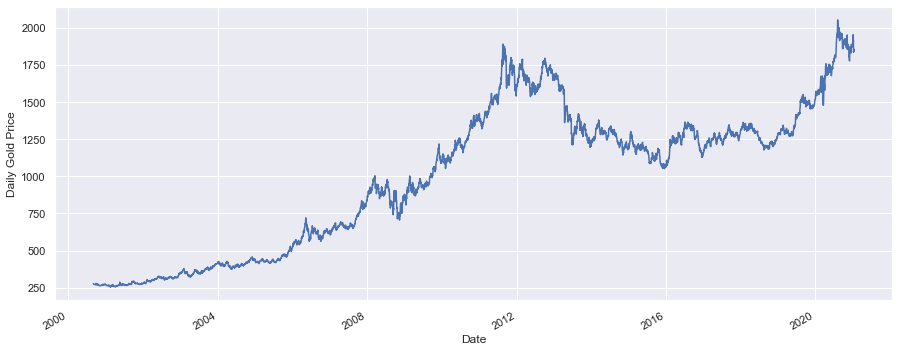

In [391]:
gold['GC=F'].plot()
plt.ylabel("Daily Gold Price")

In [392]:
data = gold['GC=F']

In [393]:
data.head()

Date
2000-09-01    277.000000
2000-09-05    275.799988
2000-09-06    274.200012
2000-09-07    274.000000
2000-09-08    273.299988
Name: GC=F, dtype: float64

Text(0, 0.5, 'Weekly Gold Price')

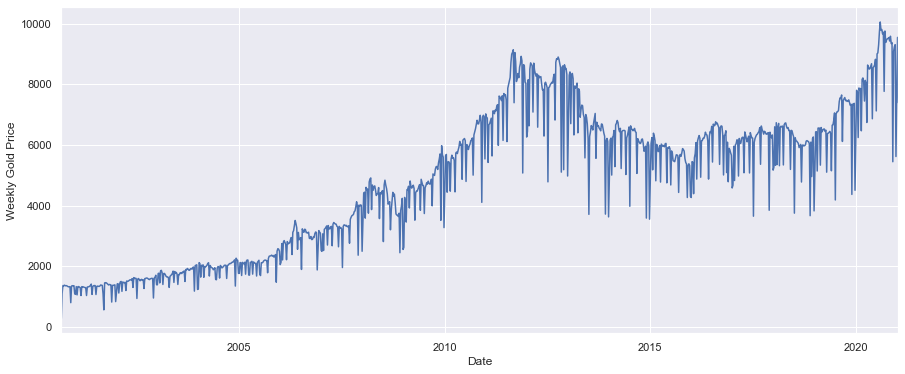

In [394]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel("Weekly Gold Price")

<AxesSubplot:xlabel='Date'>

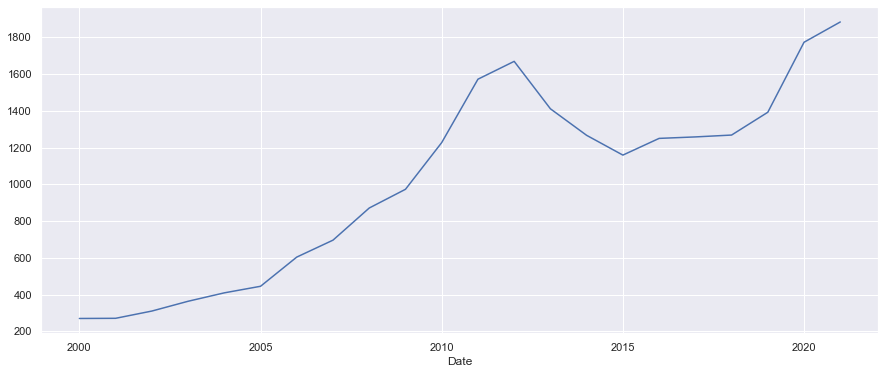

In [395]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

<AxesSubplot:>

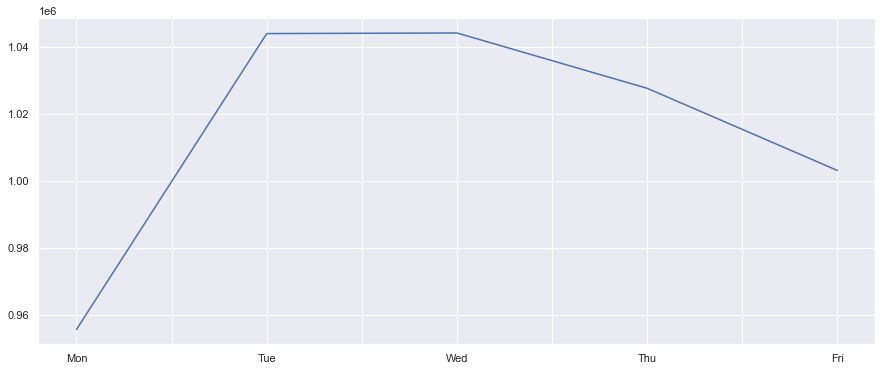

In [396]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon','Tue','Wed','Thu','Fri']
by_weekday.plot()

<AxesSubplot:xlabel='Date'>

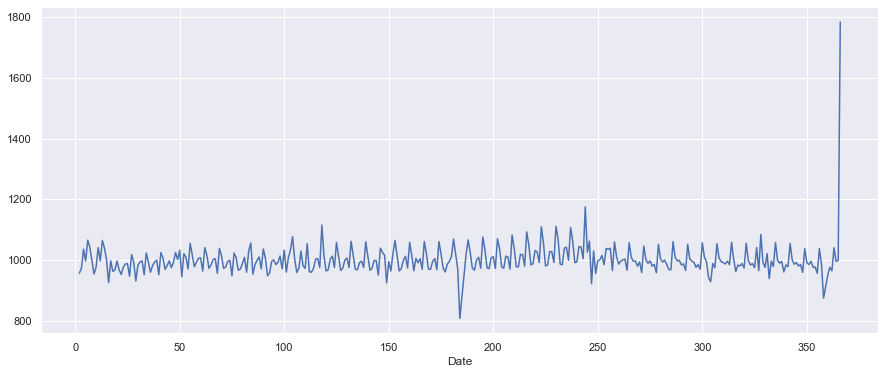

In [397]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

<AxesSubplot:xlabel='Date'>

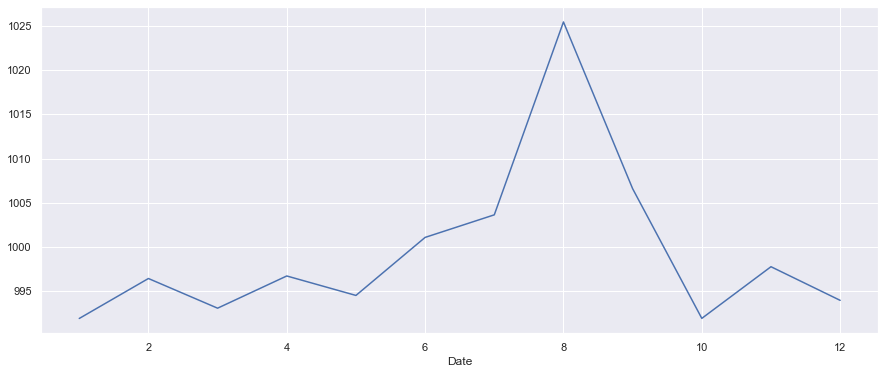

In [398]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

<AxesSubplot:xlabel='Date'>

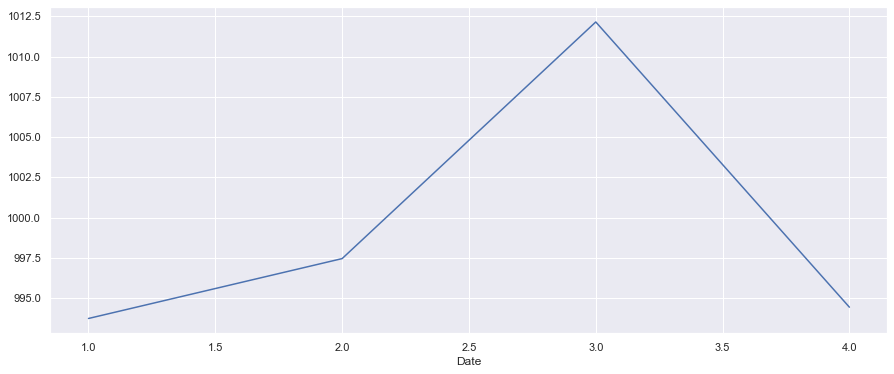

In [399]:
by_quarter = data.groupby(data.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: GC=F, dtype: object

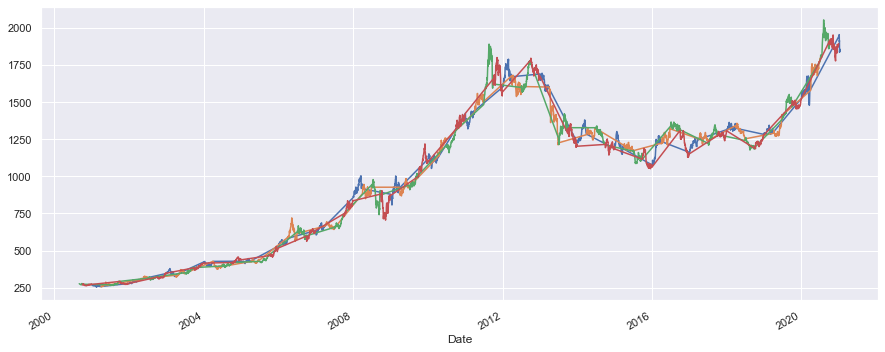

In [400]:
by_quarter = data.groupby(data.index.quarter)
by_quarter.plot()

<AxesSubplot:xlabel='Date'>

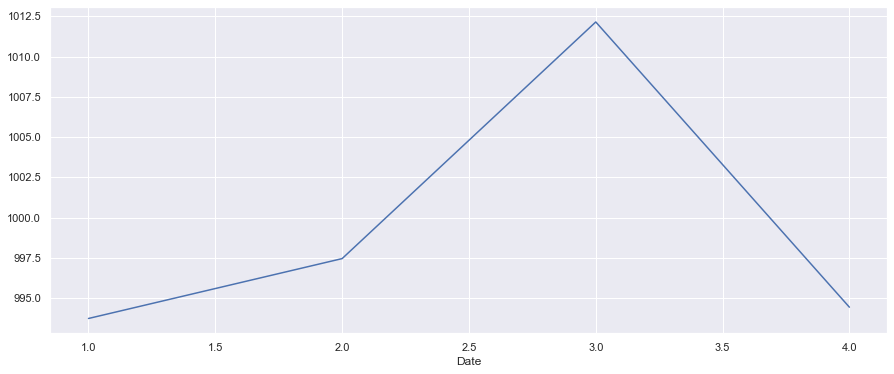

In [401]:
by_quarter_overall = data.groupby(data.index.quarter).mean()
by_quarter_overall.plot()

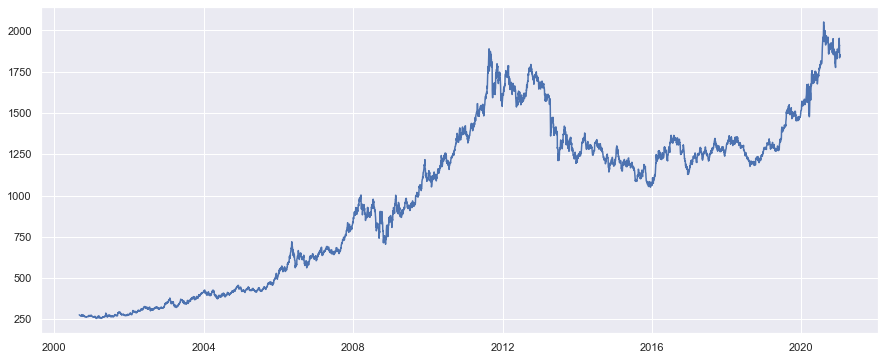

In [402]:
ts = data
plt.plot(ts)

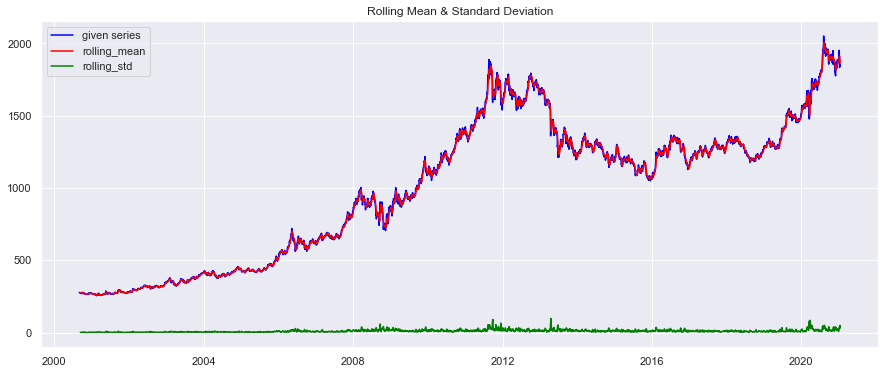

Result of Dickey-Fuller Test:
Test Statistic                  -0.594759
p-value                          0.872162
#lags Used                      11.000000
Number of observation used    5065.000000
Critical value (1%)             -3.431642
Critical value (5%)             -2.862111
Critical value (10%)            -2.567074
dtype: float64


In [403]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7, center = False).mean()
    r_std = input_data.rolling(window = 7, center = False).std()
    
    #plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color = 'green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #perform Dickey-Fuller test
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#lags Used','Number of observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
   
test_for_stationary(ts)

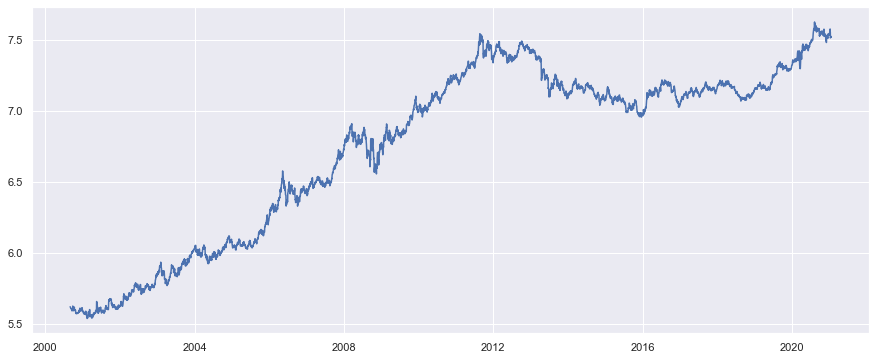

In [404]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [405]:
ts_logtransformed.head(10)

Date
2000-09-01    5.624018
2000-09-05    5.619676
2000-09-06    5.613858
2000-09-07    5.613128
2000-09-08    5.610570
2000-09-11    5.609838
2000-09-12    5.609105
2000-09-13    5.608739
2000-09-14    5.607272
2000-09-15    5.606904
Name: GC=F, dtype: float64

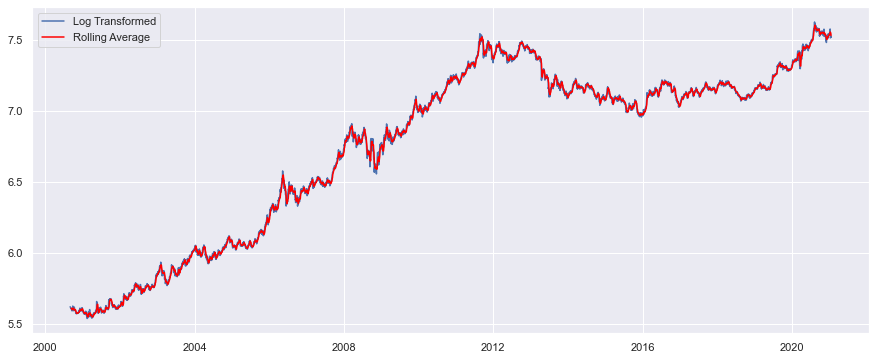

In [406]:
Rolling_average = ts_logtransformed.rolling(window = 7, center = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [407]:
Rolling_average.head(10)

Date
2000-09-01         NaN
2000-09-05         NaN
2000-09-06         NaN
2000-09-07         NaN
2000-09-08         NaN
2000-09-11         NaN
2000-09-12    5.614313
2000-09-13    5.612131
2000-09-14    5.610359
2000-09-15    5.609365
Name: GC=F, dtype: float64

In [408]:
log_rolling_difference = ts_logtransformed - Rolling_average
log_rolling_difference.head(10)
log_rolling_difference.tail(10)

Date
2020-12-31    0.006840
2021-01-04    0.028838
2021-01-05    0.026501
2021-01-06    0.000334
2021-01-07    0.000515
2021-01-08   -0.037729
2021-01-11   -0.026151
2021-01-12   -0.025941
2021-01-13   -0.013298
2021-01-14   -0.007385
Name: GC=F, dtype: float64

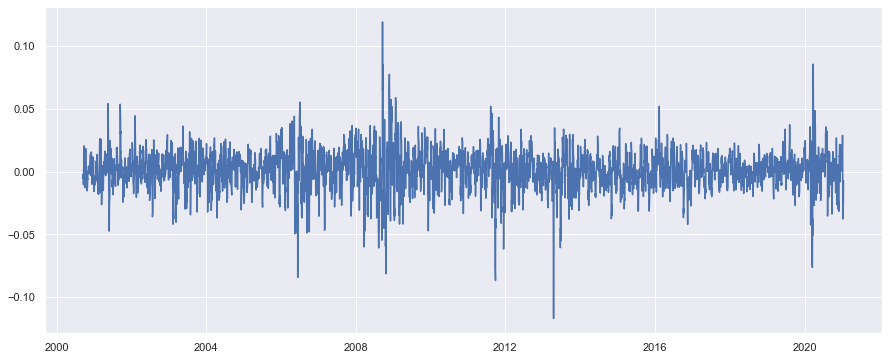

In [409]:
log_rolling_difference.dropna(inplace = True)
plt.plot(log_rolling_difference)

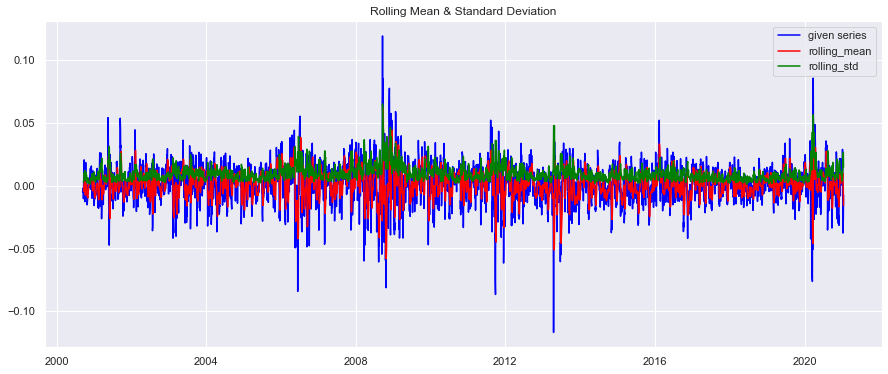

Result of Dickey-Fuller Test:
Test Statistic               -1.589985e+01
p-value                       8.353481e-29
#lags Used                    2.000000e+01
Number of observation used    5.050000e+03
Critical value (1%)          -3.431646e+00
Critical value (5%)          -2.862113e+00
Critical value (10%)         -2.567075e+00
dtype: float64


In [410]:
test_for_stationary(log_rolling_difference)

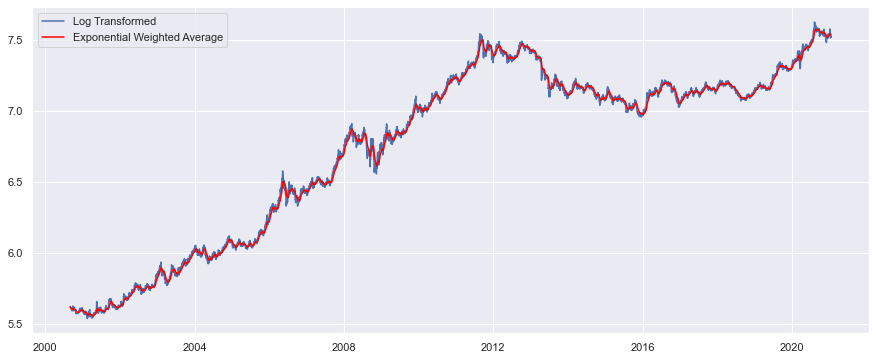

In [411]:
expweighted_avg = ts_logtransformed.ewm(halflife = 7, min_periods = 0, adjust = True, ignore_na = False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(expweighted_avg, color = 'red', label = 'Exponential Weighted Average')
plt.legend(loc = 'best')

In [412]:
expweighted_avg.head(10)

Date
2000-09-01    5.624018
2000-09-05    5.621739
2000-09-06    5.618848
2000-09-07    5.617199
2000-09-08    5.615599
2000-09-11    5.614386
2000-09-12    5.613391
2000-09-13    5.612589
2000-09-14    5.611739
2000-09-15    5.611014
Name: GC=F, dtype: float64

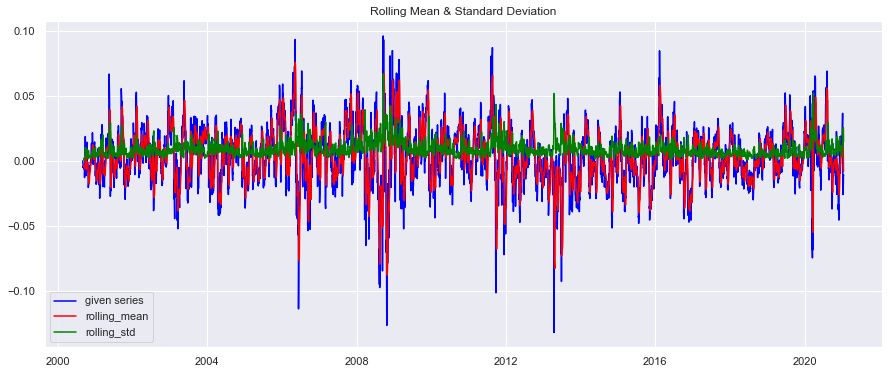

Result of Dickey-Fuller Test:
Test Statistic               -1.360995e+01
p-value                       1.881537e-25
#lags Used                    1.100000e+01
Number of observation used    5.065000e+03
Critical value (1%)          -3.431642e+00
Critical value (5%)          -2.862111e+00
Critical value (10%)         -2.567074e+00
dtype: float64


In [413]:
log_expmovwt_diff = ts_logtransformed - expweighted_avg
test_for_stationary(log_expmovwt_diff)

<AxesSubplot:xlabel='Date'>

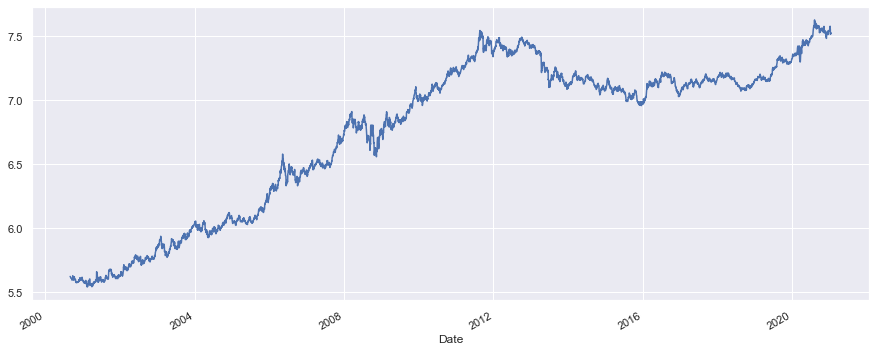

In [414]:
ts_logtransformed.plot()

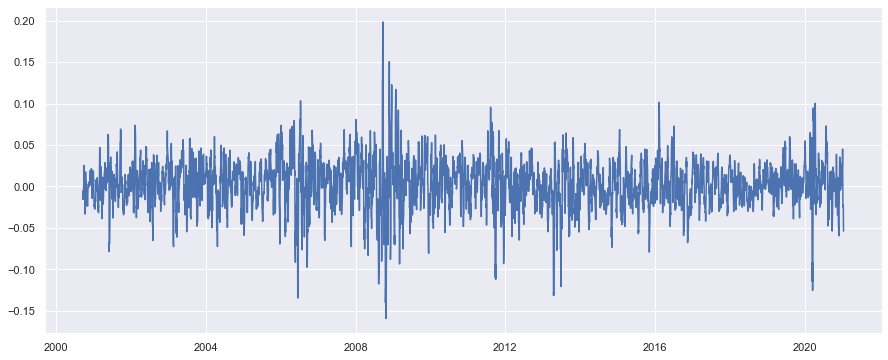

In [415]:
ts_diff_logtrans = ts_logtransformed - ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)

In [416]:
ts_diff_logtrans.head(10)

Date
2000-09-01         NaN
2000-09-05         NaN
2000-09-06         NaN
2000-09-07         NaN
2000-09-08         NaN
2000-09-11         NaN
2000-09-12         NaN
2000-09-13   -0.015279
2000-09-14   -0.012404
2000-09-15   -0.006953
Name: GC=F, dtype: float64

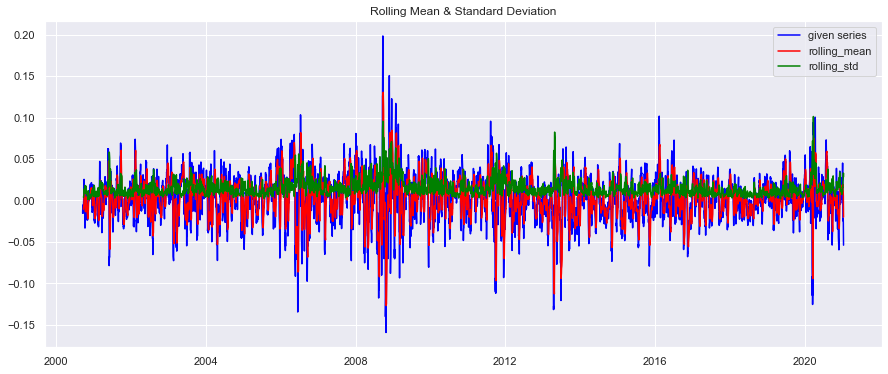

Result of Dickey-Fuller Test:
Test Statistic               -1.314288e+01
p-value                       1.417545e-24
#lags Used                    3.300000e+01
Number of observation used    5.036000e+03
Critical value (1%)          -3.431649e+00
Critical value (5%)          -2.862114e+00
Critical value (10%)         -2.567076e+00
dtype: float64


In [417]:
ts_diff_logtrans.dropna(inplace = True)
test_for_stationary(ts_diff_logtrans)

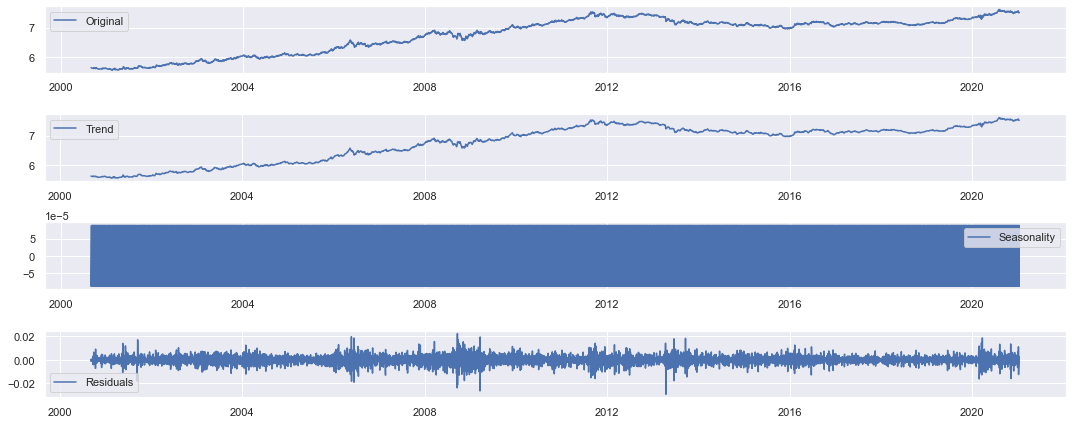

In [418]:
decomposition = seasonal_decompose(ts_logtransformed, period=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

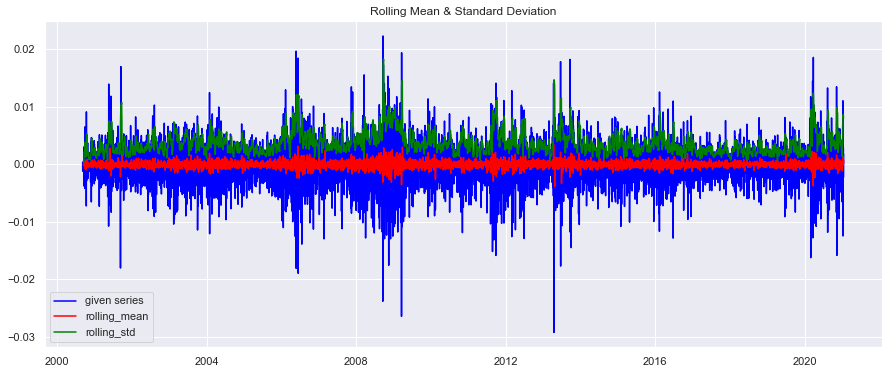

Result of Dickey-Fuller Test:
Test Statistic                 -20.877042
p-value                          0.000000
#lags Used                      33.000000
Number of observation used    5041.000000
Critical value (1%)             -3.431648
Critical value (5%)             -2.862114
Critical value (10%)            -2.567075
dtype: float64


In [419]:
decomposed_TS = residual
decomposed_TS.dropna(inplace = True)
test_for_stationary(decomposed_TS)

In [420]:
lag_acf = acf(ts_diff_logtrans, nlags = 30)
lag_pacf = pacf(ts_diff_logtrans, nlags = 50, method = 'ols')

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'AutoCorrelation Function')

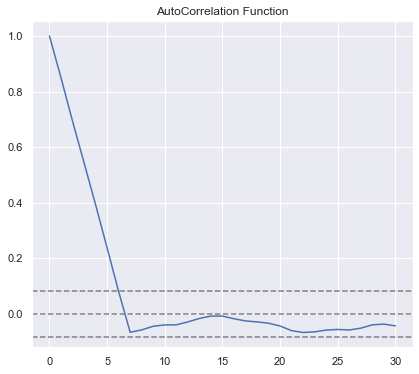

In [421]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=5.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('AutoCorrelation Function')

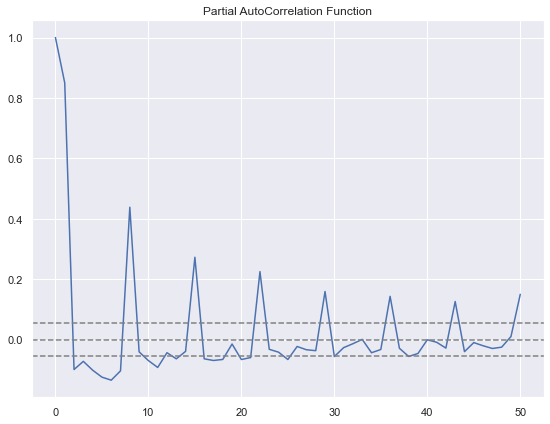

In [422]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.axhline(y=3.96/np.sqrt(len(ts_diff_logtrans)), linestyle='--', color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

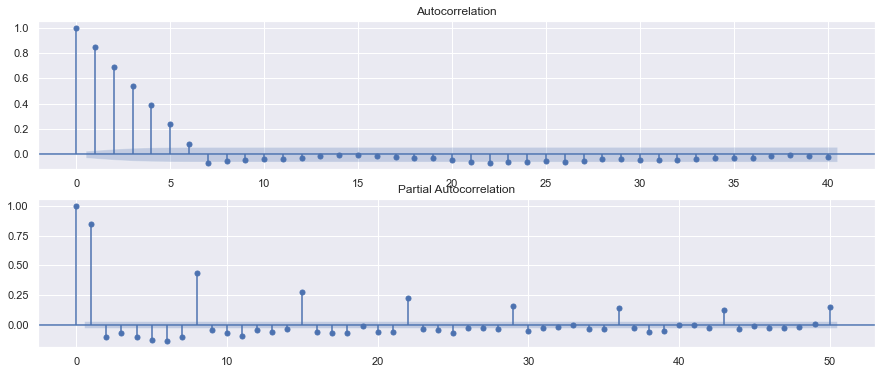

In [423]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(), lags =40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags =50)
pyplot.show()

In [424]:
from statsmodels.tsa.arima_model import ARIMA

In [425]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

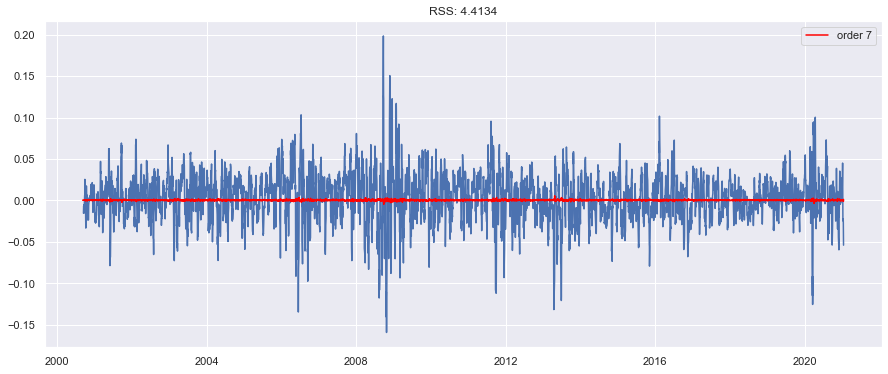

In [426]:
model = ARIMA(ts_logtransformed, order = (8,1,0))
result_AR = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 7')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [427]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5076
Model:                 ARIMA(8, 1, 0)   Log Likelihood               15609.249
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 06 Mar 2021   AIC                         -31198.498
Time:                        14:19:40   BIC                         -31133.175
Sample:                             1   HQIC                        -31175.620
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.596      0.009    9.18e-05       0.001
ar.L1.D.GC=F    -0.0099      0.014     -0.707      0.480      -0.037       0.018
ar.L2.D.GC=F    -0.0032      0.014     -0.22

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

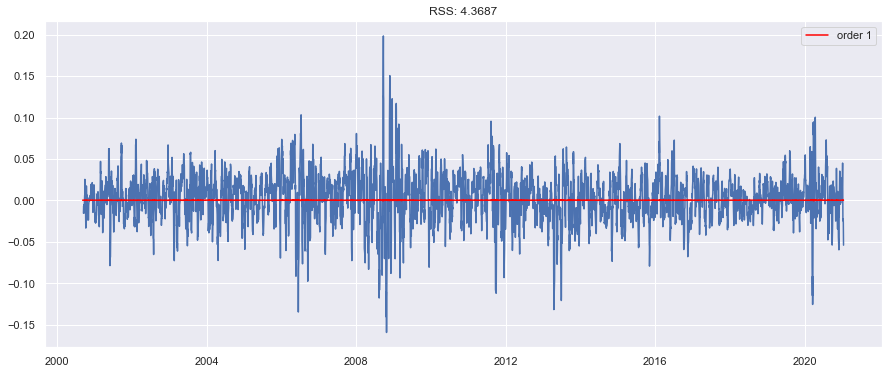

In [428]:
model = ARIMA(ts_logtransformed, order = (2,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 1')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [429]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5076
Model:                 ARIMA(2, 1, 0)   Log Likelihood               15602.461
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 06 Mar 2021   AIC                         -31196.921
Time:                        14:19:50   BIC                         -31170.792
Sample:                             1   HQIC                        -31187.770
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.410      0.016    6.98e-05       0.001
ar.L1.D.GC=F    -0.0089      0.014     -0.635      0.525      -0.036       0.019
ar.L2.D.GC=F    -0.0027      0.014     -0.19

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

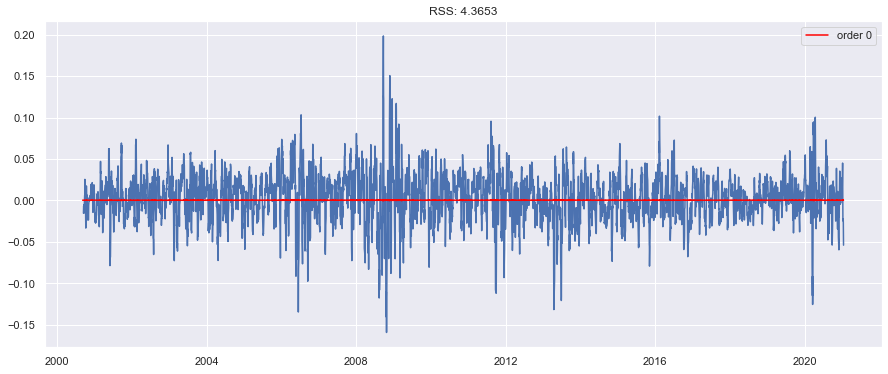

In [430]:
model = ARIMA(ts_logtransformed, order = (1,1,0))
result_AR = model.fit(disp=1)
plt.plot(ts_diff_logtrans)
plt.plot(result_AR.fittedvalues, color = 'red', label = 'order 0')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [431]:
print(result_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5076
Model:                 ARIMA(1, 1, 0)   Log Likelihood               15602.442
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 06 Mar 2021   AIC                         -31198.883
Time:                        14:20:08   BIC                         -31179.286
Sample:                             1   HQIC                        -31192.020
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.403      0.016     6.9e-05       0.001
ar.L1.D.GC=F    -0.0089      0.014     -0.633      0.526      -0.036       0.019
                                    Roots   

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

Text(0.5, 1.0, 'RSS: 4.3653')

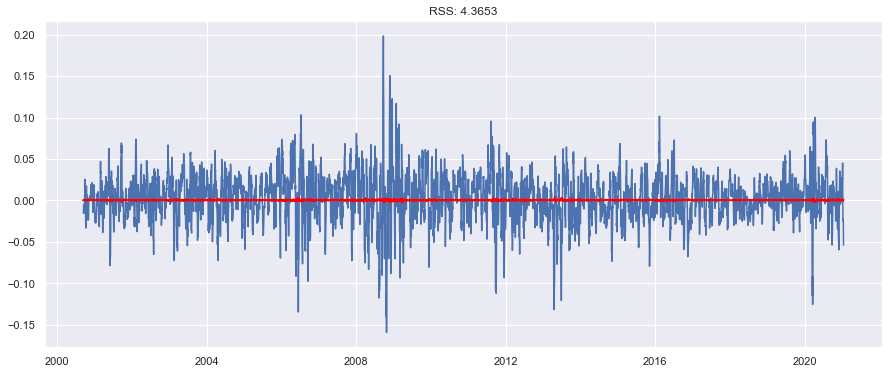

In [432]:
model = ARIMA(ts_logtransformed, order = (0,1,6))
result_MA = model.fit(disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'order 6')
RSS = result_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
#plt.legend(loc = 'best')

In [433]:
print(result_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5076
Model:                 ARIMA(0, 1, 6)   Log Likelihood               15607.322
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 06 Mar 2021   AIC                         -31198.645
Time:                        14:20:18   BIC                         -31146.387
Sample:                             1   HQIC                        -31180.343
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      2.520      0.012    8.33e-05       0.001
ma.L1.D.GC=F    -0.0110      0.014     -0.781      0.435      -0.038       0.017
ma.L2.D.GC=F    -0.0034      0.014     -0.23

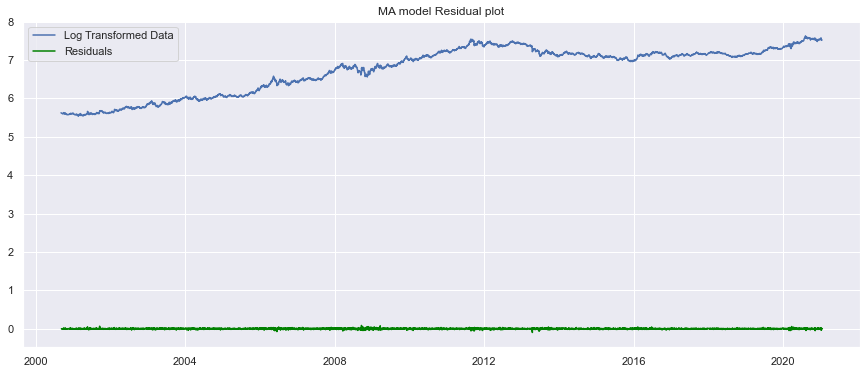

In [434]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_MA.resid, color = 'green', label = 'Residuals')
plt.title('MA model Residual plot')
plt.legend(loc = 'best')

count    5.076000e+03
mean    -1.649348e-07
std      1.118066e-02
min     -9.819054e-02
25%     -5.212853e-03
50%      1.523609e-04
75%      5.887767e-03
max      8.526601e-02
dtype: float64


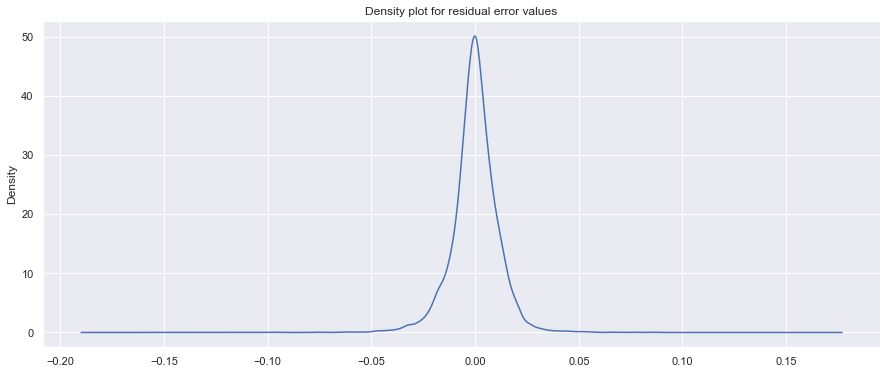

In [435]:
result_MA.resid.plot(kind = 'kde')
plt.title('Density plot for residual error values')
print(result_MA.resid.describe())

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date

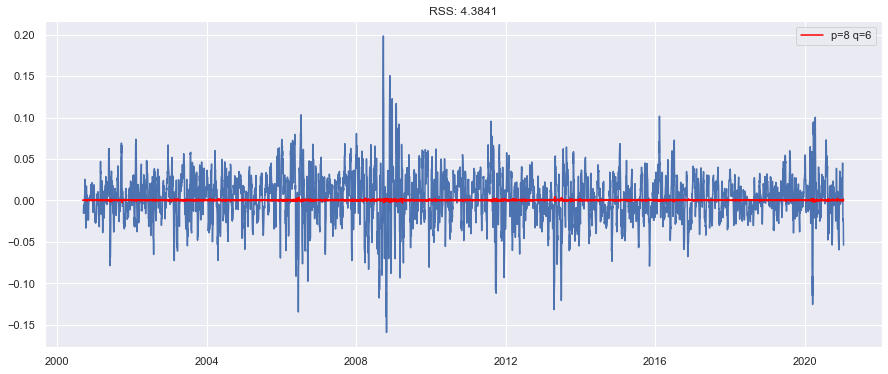

In [436]:
model = ARIMA(ts_logtransformed, order = (8,1,6))
result_ARIMA = model.fit(trend = 'nc',disp=-1)
plt.plot(ts_diff_logtrans)
plt.plot(result_MA.fittedvalues, color = 'red', label = 'p=8 q=6')
RSS = result_ARIMA.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title("RSS: %.4f"%sum(RSS**2))
plt.legend(loc = 'best')

In [437]:
print(result_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.GC=F   No. Observations:                 5076
Model:                 ARIMA(8, 1, 6)   Log Likelihood               15620.200
Method:                       css-mle   S.D. of innovations              0.011
Date:                Sat, 06 Mar 2021   AIC                         -31210.399
Time:                        14:21:31   BIC                         -31112.415
Sample:                             1   HQIC                        -31176.083
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.GC=F    -0.3637      0.496     -0.734      0.463      -1.335       0.608
ar.L2.D.GC=F    -0.2397      0.093     -2.566      0.010      -0.423      -0.057
ar.L3.D.GC=F     0.0599      0.112      0.53

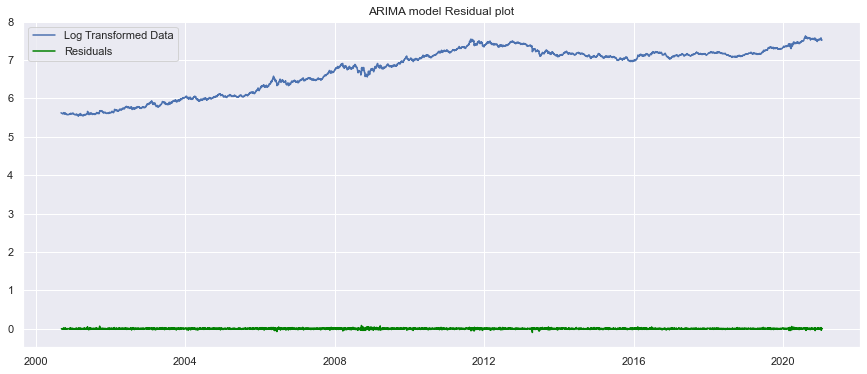

In [438]:
plt.plot(ts_logtransformed, label = 'Log Transformed Data')
plt.plot(result_ARIMA.resid, color = 'green', label = 'Residuals')
plt.title('ARIMA model Residual plot')
plt.legend(loc = 'best')

count    5076.000000
mean        0.000439
std         0.011143
min        -0.098989
25%        -0.004791
50%         0.000533
75%         0.006291
max         0.083712
dtype: float64


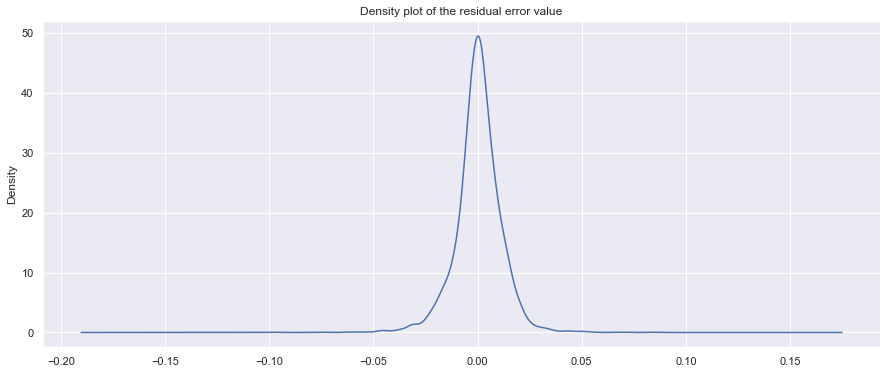

In [439]:
result_ARIMA.resid.plot(kind = 'kde')
plt.title('Density plot of the residual error value')
print(result_ARIMA.resid.describe())

In [440]:
#test = pd.read_csv("/Users/priyaramasamy/Downloads/GC=F.csv",index_col='Date')
#test.index = pd.to_datetime(test.index)
#test = test['Close']
#test = test.sort_index()
test = data

In [441]:
print(test[0])

277.0


In [442]:
print(data[0])

277.0


In [443]:
test_data = test.dropna()

In [444]:
test_data.shape

(5077,)

In [445]:
test_data

Date
2000-09-01     277.000000
2000-09-05     275.799988
2000-09-06     274.200012
2000-09-07     274.000000
2000-09-08     273.299988
                 ...     
2021-01-08    1834.099976
2021-01-11    1849.599976
2021-01-12    1842.900024
2021-01-13    1853.599976
2021-01-14    1850.300049
Name: GC=F, Length: 5077, dtype: float64

In [446]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy = True)
print(prediction_ARIMA_diff.head())

Date
2000-09-05    0.000000
2000-09-06    0.000034
2000-09-07    0.000052
2000-09-08   -0.000013
2000-09-11    0.000006
dtype: float64


In [447]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Date
2000-09-05    0.000000
2000-09-06    0.000034
2000-09-07    0.000086
2000-09-08    0.000073
2000-09-11    0.000079
dtype: float64


In [448]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

Date
2000-09-01    5.624018
2000-09-05    5.624018
2000-09-06    5.624051
2000-09-07    5.624103
2000-09-08    5.624090
dtype: float64

Text(0.5, 1.0, 'RMSE: 920.2940')

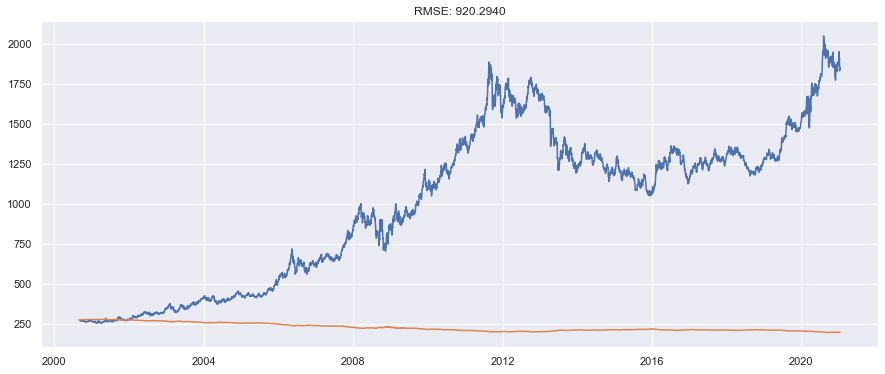

In [449]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title("RMSE: %.4f"%np.sqrt(sum((predictions_ARIMA - data)**2)/len(data)))

In [462]:
#new
print(s.index)

Int64Index([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
            32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
            49, 50],
           dtype='int64', name='num')


In [469]:
#new here we got input val which is to put on the Steps=
for i in s.index:
    o=s.Steps[i]

In [472]:
o

36

In [473]:
dates = [pd.Timestamp('2021-02-28'),pd.Timestamp('2021-03-01'),pd.Timestamp('2021-03-02'),pd.Timestamp('2021-03-03'),pd.Timestamp('2021-03-04')]
forecast = pd.Series(result_ARIMA.forecast(steps= 5)[0], dates)
#print(forecast)
# See above code instead of 5 we want to put o which is 36 and once we refresh the model daily it automatically changes the o val(decreasing manner)as the dates move forward(changing the end date) automatically the o val decreases
forecast = np.exp(forecast)
print(forecast)


2021-02-28    7.523711
2021-03-01    7.524950
2021-03-02    7.525250
2021-03-03    7.525611
2021-03-04    7.524608
dtype: float64
2021-02-28    1851.425681
2021-03-01    1853.720833
2021-03-02    1854.277304
2021-03-03    1854.946675
2021-03-04    1853.087096
dtype: float64


In [474]:
from sklearn.metrics import mean_squared_error

In [475]:
#y_true = test
#y_pred = forecast
#error = mean_squared_error(y_true,y_pred)
#print('Test MSE: %.3f' %error)

In [476]:
#test.shape

In [477]:
#forecast.shape

In [478]:
prediction_MA_diff = pd.Series(result_MA.fittedvalues, copy = True)
print(prediction_MA_diff.head())

Date
2000-09-05    0.000375
2000-09-06    0.000427
2000-09-07    0.000459
2000-09-08    0.000373
2000-09-11    0.000390
dtype: float64


In [479]:
prediction_MA_diff_cumsum = prediction_MA_diff.cumsum()
print(prediction_MA_diff_cumsum.head())

Date
2000-09-05    0.000375
2000-09-06    0.000801
2000-09-07    0.001260
2000-09-08    0.001634
2000-09-11    0.002024
dtype: float64


In [480]:
prediction_MA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
prediction_MA_log = prediction_MA_log.add(prediction_MA_diff_cumsum, fill_value=0)
prediction_MA_log.head()

Date
2000-09-01    5.624018
2000-09-05    5.624392
2000-09-06    5.624819
2000-09-07    5.625278
2000-09-08    5.625651
dtype: float64

Text(0.5, 1.0, 'RMSE: 357.4863')

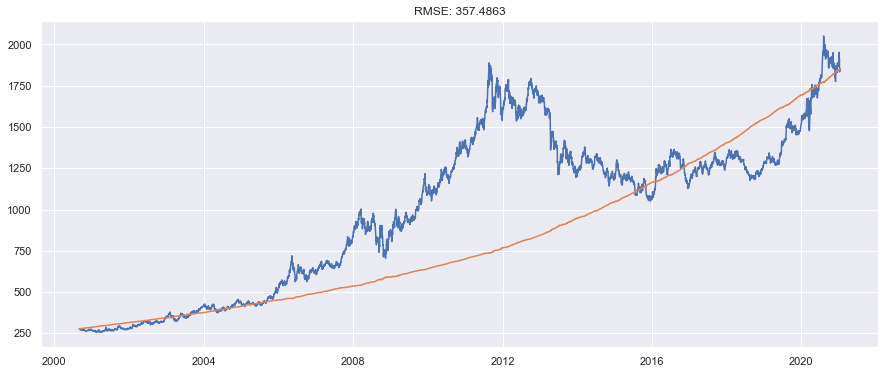

In [481]:
prediction_MA = np.exp(prediction_MA_log)
plt.plot(data)
plt.plot(prediction_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((prediction_MA - data)**2)/len(data)))

In [ ]:
#o dates create pannanum+ s la eruks val
#df la steps dates predictval

#steps o 36

In [ ]:
for i in s.index:
    t = s.Steps[i]
    for j in 

In [116]:
dates = [pd.Timestamp('2021/02/28'),pd.Timestamp('2021/03/01'),pd.Timestamp('2021-03-02'),pd.Timestamp('2021-03-03'),pd.Timestamp('2021-03-04'),pd.Timestamp('2021-03-05')]
forecast = pd.Series(result_MA.forecast(steps= 6)[0], dates)
#print(forecast)
forecast = np.exp(forecast)
print(forecast)

2021-02-28    7.455435
2021-03-01    7.455122
2021-03-02    7.455467
2021-03-03    7.456199
2021-03-04    7.457053
2021-03-05    7.457412
dtype: float64
2021-02-28    1729.236786
2021-03-01    1728.694098
2021-03-02    1729.290847
2021-03-03    1730.557036
2021-03-04    1732.036255
2021-03-05    1732.658340
dtype: float64


In [99]:
import time
import datetime

In [106]:
def predict(date):
    #string = "20/01/2020"
    dat = time.mktime(datetime.datetime.strptime(date, "%Y/%m/%d").timetuple())
    dates = [pd.Timestamp('dat')]
    forecast = pd.Series(result_MA.forecast(steps= 5)[0], dates)
    #print(forecast)
    forecast = np.exp(forecast)
    print(forecast)
    
predict("2021/02/28")

ValueError: could not convert string to Timestamp

In [240]:
from sklearn.metrics import mean_squared_error

In [241]:
#y_true = test
#y_pred = forecast
#error = mean_squared_error(y_true,y_pred)
#print('Test MSE: %.3f' %error)

In [242]:
#test.shape

In [243]:
#test.shape

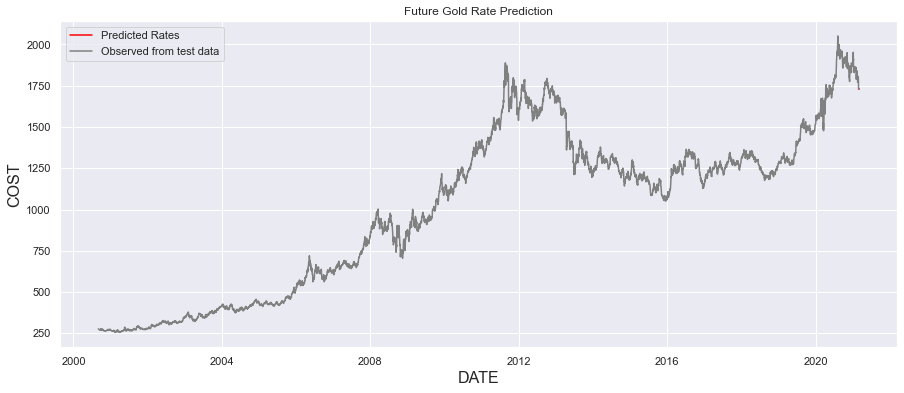

In [244]:
plt.plot(forecast, color = 'red', label = 'Predicted Rates')
plt.plot(test, color ='gray', label = 'Observed from test data')
plt.title('Future Gold Rate Prediction')
plt.ylabel('COST',fontsize = 16)
plt.xlabel('DATE',fontsize = 16)
plt.legend(loc = 'best')

In [248]:
forecast

2021-02-28    1729.236786
2021-03-01    1728.694098
2021-03-02    1729.290847
2021-03-03    1730.557036
2021-03-04    1731.178590
dtype: float64

In [250]:
forecast.dtypes

dtype('float64')

In [251]:
forecast['2021-03-04']

1731.1785901586597

In [252]:
import pickle

In [253]:
pickle.dump(forecast,open('model.pkl','wb'))

In [254]:
model = pickle.load(open('model.pkl','rb'))